# Applying colour to Gray images
[Lázaro Alonso](https://lazarusa.github.io/Webpage/index.html)
___

In [1]:
using TestImages, Images, Colors,  FileIO, PerceptualColourMaps, Plots, Pkg
pyplot()

Plots.PyPlotBackend()

### Packages, Version control

In [2]:
function pkgsVersion()
    println("Julia == " * string(VERSION))
    for (key, version) ∈ sort(collect(Pkg.installed()))
        try
            isa(eval(Symbol(key)), Module) && println(key * " == " * string(version))
        catch
        end
    end
end

pkgsVersion (generic function with 1 method)

In [3]:
pkgsVersion()

Julia == 1.0.0
Colors == 0.9.4
FileIO == 1.0.2
IJulia == 1.13.0
Images == 0.16.1
LaTeXStrings == 1.0.3
PerceptualColourMaps == 0.3.0
Plots == 0.20.6
PyCall == 1.18.5
PyPlot == 2.6.3
TestImages == 0.4.1


___

When testing ideas, it can be useful to have some images to work with. The `TestImages` package bundles several `standard` images for you. http://juliaimages.github.io/TestImages.jl/

To load one of this images, we use the `testimage` function. On the other hand, we could load an image from our computer using `load`. If we use the first one, we need to call 

In [4]:
img1 = testimage("moon")
img2 = testimage("lena_gray_256");

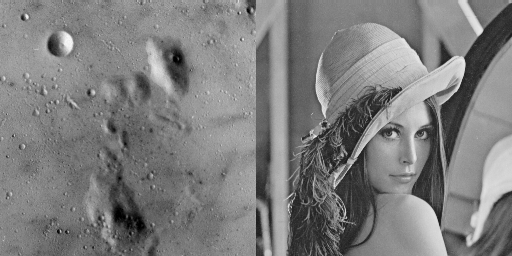

In [5]:
hcat(img1, img2)

And using the second one

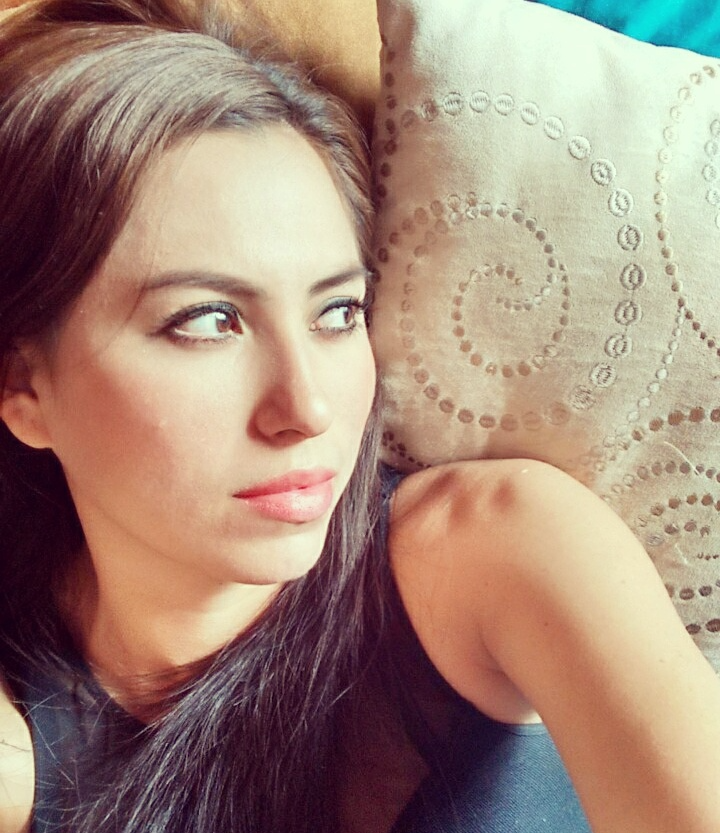

In [6]:
img = load("cici.png")

In [7]:
summary(img)

"833×720 Array{RGBA{N0f8},2} with eltype RGBA{Normed{UInt8,8}}"

If we want a smalller image, this can be done easily as follows:

In [8]:
dims = size(img)

(833, 720)

In [9]:
scale = .45

0.45

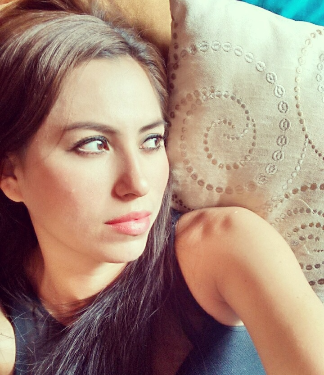

In [10]:
resized_image = imresize(img, Int64.(round.((dims[1]*scale, dims[2]*scale))))

And we can obatain a gray scale image calling: 

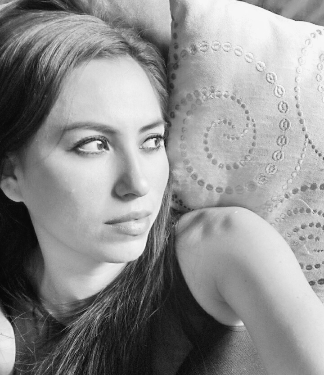

In [11]:
img = Gray.(resized_image)

In [12]:
summary(img)

"375×324 Array{Gray{N0f8},2} with eltype Gray{Normed{UInt8,8}}"

So, yeah this is a gray image.

We can display a gray scale image in color (RGB), using `PerceptualColourMaps`, as follows:

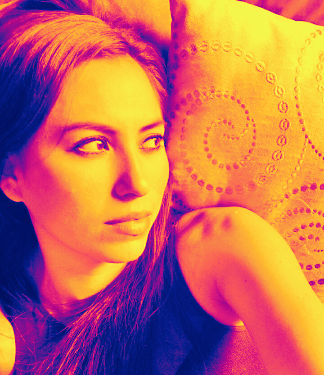

In [14]:
imgRGB = applycolormap(img, cmap("L8"));
imgRGB = colorview(RGB, permuteddimsview(imgRGB, (3,1,2)))

In [15]:
#save("ciciL8.png", imgRGB)

For several colormaps and using `Plots` we show a layaout with different examples as follows: 

In [16]:
colorMaps = ["Gray", "L8", "L3", "BGYW", "HEAT", "R2", "R1", "L2", "L11", "COOLWARM"]
imgall = []
for (indx, colorMap) in enumerate(colorMaps)
    imgRGB = applycolormap(img, cmap(colorMap))
    imgRGB = colorview(RGB, permuteddimsview(imgRGB, (3,1,2)))
    push!(imgall, imgRGB)
end

10-element Array{Base.ReshapedArray{RGB{Float64},2,Base.ReinterpretArray{RGB{Float64},3,Float64,PermutedDimsArray{Float64,3,(3, 1, 2),(2, 3, 1),Array{Float64,3}}},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}},1}:
 [RGB{Float64}(0.530979,0.530979,0.530979) RGB{Float64}(0.499444,0.499444,0.499444) … RGB{Float64}(0.487709,0.487709,0.487709) RGB{Float64}(0.538917,0.538917,0.538917); RGB{Float64}(0.487709,0.487709,0.487709) RGB{Float64}(0.542894,0.542894,0.542894) … RGB{Float64}(0.507295,0.507295,0.507295) RGB{Float64}(0.546876,0.546876,0.546876); … ; RGB{Float64}(0.578922,0.578922,0.578922) RGB{Float64}(0.611296,0.611296,0.611296) … RGB{Float64}(0.760784,0.760784,0.760784) RGB{Float64}(0.777758,0.777758,0.777758); RGB{Float64}(0.558855,0.558855,0.558855) RGB{Float64}(0.57088,0.57088,0.57088) … RGB{Float64}(0.756552,0.756552,0.756552) RGB{Float64}(0.765021,0.765021,0.765021)]          
 [RGB{Float64}(0.960468,0.313864,0.370019) RGB{Float64}(0.936552,0.260618,0.403864) … RGB{Float64}(0.928357,0.235765,0.423371) RGB{Float64}(0.966303,0.326388,0.361243); RGB{Float64}(0.928357,0.235765,0.423371) RGB{Float64}(0.9692,0.332557,0.356799) … RGB{Float64}(0.94262,0.274495,0.395572) RGB{Float64}(0.972084,0.33867,0.352317); … ; RGB{Float64}(0.976367,0.402619,0.326135) RGB{Float64}(0.977488,0.4613,0.309933) … RGB{Float64}(0.987669,0.679965,0.212774) RGB{Float64}(0.991526,0.700695,0.202065); RGB{Float64}(0.975164,0.362849,0.335456) RGB{Float64}(0.975931,0.387058,0.329932) … RGB{Float64}(0.986681,0.674767,0.215305) RGB{Float64}(0.988648,0.685157,0.210187)]             
 [RGB{Float64}(0.999566,0.231904,0.0) RGB{Float64}(0.979172,0.129041,0.0) … RGB{Float64}(0.961298,0.110971,0.0) RGB{Float64}(0.999939,0.259745,0.0); RGB{Float64}(0.961298,0.110971,0.0) RGB{Float64}(0.999727,0.273272,0.0) … RGB{Float64}(0.990864,0.14072,0.0) RGB{Float64}(0.999257,0.28657,0.0); … ; RGB{Float64}(0.994318,0.378584,0.0) RGB{Float64}(0.995931,0.448639,0.0) … RGB{Float64}(0.995166,0.708623,0.0) RGB{Float64}(1.0,0.730193,0.0114449); RGB{Float64}(1.0,0.317111,0.00340918) RGB{Float64}(1.0,0.346603,0.0068643) … RGB{Float64}(1.0,0.699492,0.0013871) RGB{Float64}(1.0,0.712787,0.000125016)]                                                                                 
 [RGB{Float64}(0.318265,0.690673,0.0114134) RGB{Float64}(0.188442,0.672325,0.0284766) … RGB{Float64}(0.144065,0.663937,0.021217) RGB{Float64}(0.340838,0.695581,0.0110634); RGB{Float64}(0.144065,0.663937,0.021217) RGB{Float64}(0.344433,0.698888,0.0190979) … RGB{Float64}(0.221256,0.677374,0.0282371) RGB{Float64}(0.362492,0.700461,0.0107321); … ; RGB{Float64}(0.442685,0.719697,0.00960748) RGB{Float64}(0.516375,0.738483,0.00883742) … RGB{Float64}(0.825554,0.814926,0.0) RGB{Float64}(0.857467,0.823079,0.0); RGB{Float64}(0.386895,0.70862,0.0186568) RGB{Float64}(0.423401,0.71493,0.00985715) … RGB{Float64}(0.813154,0.814136,0.000138425) RGB{Float64}(0.829169,0.818257,0.000455199)]
 [RGB{Float64}(0.999566,0.231904,0.0) RGB{Float64}(0.979172,0.129041,0.0) … RGB{Float64}(0.961298,0.110971,0.0) RGB{Float64}(0.999939,0.259745,0.0); RGB{Float64}(0.961298,0.110971,0.0) RGB{Float64}(0.999727,0.273272,0.0) … RGB{Float64}(0.990864,0.14072,0.0) RGB{Float64}(0.999257,0.28657,0.0); … ; RGB{Float64}(0.994318,0.378584,0.0) RGB{Float64}(0.995931,0.448639,0.0) … RGB{Float64}(0.995166,0.708623,0.0) RGB{Float64}(1.0,0.730193,0.0114449); RGB{Float64}(1.0,0.317111,0.00340918) RGB{Float64}(1.0,0.346603,0.0068643) … RGB{Float64}(1.0,0.699492,0.0013871) RGB{Float64}(1.0,0.712787,0.000125016)]                                                                                 
 [RGB{Float64}(0.844505,0.788821,0.154896) RGB{Float64}(0.776994,0.773543,0.141079) … RGB{Float64}(0.751412,0.767686,0.135936) RGB{Float64}(0.861392,0.792517,0.158289); RGB{Float64}(0.751412,0.767686,0.135936) RGB{Float64}(0.869775,0.794367,0.160015) … RGB{Float64}(0.793887,0.777431,0.144564) 
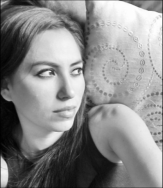
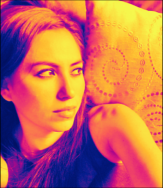
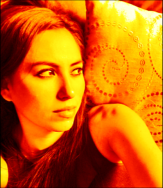
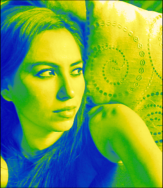
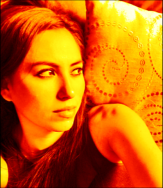
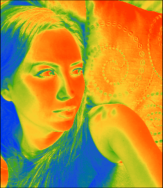
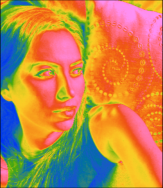
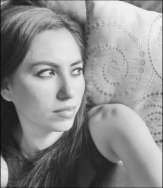
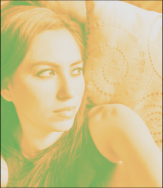
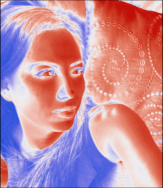

In [17]:
rowimg = [imgall[i] for i in 1:length(imgall)]

2×5 Array{Base.ReshapedArray{RGB{Float64},2,Base.ReinterpretArray{RGB{Float64},3,Float64,PermutedDimsArray{Float64,3,(3, 1, 2),(2, 3, 1),Array{Float64,3}}},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}},2}:
 [RGB{Float64}(0.530979,0.530979,0.530979) RGB{Float64}(0.499444,0.499444,0.499444) … RGB{Float64}(0.487709,0.487709,0.487709) RGB{Float64}(0.538917,0.538917,0.538917); RGB{Float64}(0.487709,0.487709,0.487709) RGB{Float64}(0.542894,0.542894,0.542894) … RGB{Float64}(0.507295,0.507295,0.507295) RGB{Float64}(0.546876,0.546876,0.546876); … ; RGB{Float64}(0.578922,0.578922,0.578922) RGB{Float64}(0.611296,0.611296,0.611296) … RGB{Float64}(0.760784,0.760784,0.760784) RGB{Float64}(0.777758,0.777758,0.777758); RGB{Float64}(0.558855,0.558855,0.558855) RGB{Float64}(0.57088,0.57088,0.57088) … RGB{Float64}(0.756552,0.756552,0.756552) RGB{Float64}(0.765021,0.765021,0.765021)]  …  [RGB{Float64}(0.907316,0.745798,0.44024) RGB{Float64}(0.905592,0.73442,0.434291) … RGB{Float64}(0.904379,0.730377,0.431915) RGB{Float64}(0.907365,0.748788,0.441629); RGB{Float64}(0.904379,0.730377,0.431915) RGB{Float64}(0.90776,0.750136,0.442425) … RGB{Float64}(0.90566,0.737414,0.435677) RGB{Float64}(0.908154,0.751484,0.44322); … ; RGB{Float64}(0.909131,0.762555,0.45961) RGB{Float64}(0.908508,0.773106,0.495086) … RGB{Float64}(0.89825,0.821252,0.652315) RGB{Float64}(0.89628,0.826669,0.669701); RGB{Float64}(0.908585,0.755821,0.445409) RGB{Float64}(0.908735,0.760029,0.45207) … RGB{Float64}(0.898401,0.819955,0.648631) RGB{Float64}(0.896821,0.822773,0.658648)]   
 [RGB{Float64}(0.960468,0.313864,0.370019) RGB{Float64}(0.936552,0.260618,0.403864) … RGB{Float64}(0.928357,0.235765,0.423371) RGB{Float64}(0.966303,0.326388,0.361243); RGB{Float64}(0.928357,0.235765,0.423371) RGB{Float64}(0.9692,0.332557,0.356799) … RGB{Float64}(0.94262,0.274495,0.395572) RGB{Float64}(0.972084,0.33867,0.352317); … ; RGB{Float64}(0.976367,0.402619,0.326135) RGB{Float64}(0.977488,0.4613,0.309933) … RGB{Float64}(0.987669,0.679965,0.212774) RGB{Float64}(0.991526,0.700695,0.202065); RGB{Float64}(0.975164,0.362849,0.335456) RGB{Float64}(0.975931,0.387058,0.329932) … RGB{Float64}(0.986681,0.674767,0.215305) RGB{Float64}(0.988648,0.685157,0.210187)]        [RGB{Float64}(0.944755,0.838108,0.81181) RGB{Float64}(0.94353,0.887058,0.873199) … RGB{Float64}(0.942345,0.905282,0.896302) RGB{Float64}(0.944657,0.825888,0.79658); RGB{Float64}(0.942345,0.905282,0.896302) RGB{Float64}(0.944549,0.819781,0.788982) … RGB{Float64}(0.944085,0.874811,0.857784) RGB{Float64}(0.944403,0.813675,0.781397); … ; RGB{Float64}(0.941879,0.764871,0.721148) RGB{Float64}(0.937049,0.716106,0.661687) … RGB{Float64}(0.890001,0.49468,0.40437) RGB{Float64}(0.882463,0.469464,0.376836); RGB{Float64}(0.943736,0.795365,0.758712) RGB{Float64}(0.942731,0.777066,0.736137) … RGB{Float64}(0.891819,0.50095,0.411286) RGB{Float64}(0.888157,0.488397,0.397467)]
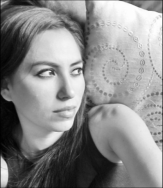
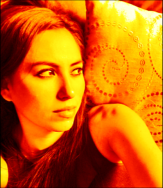
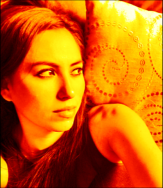
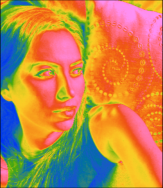
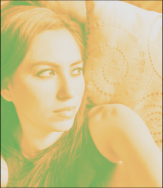
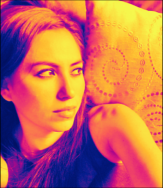
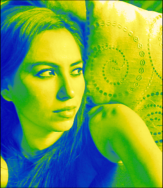
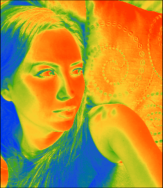
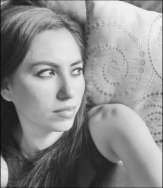
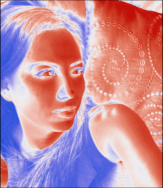

In [18]:
gridoutput = reshape(rowimg , (2,5))

We can also use `Plots` to show the results, but it is pretty slow. 

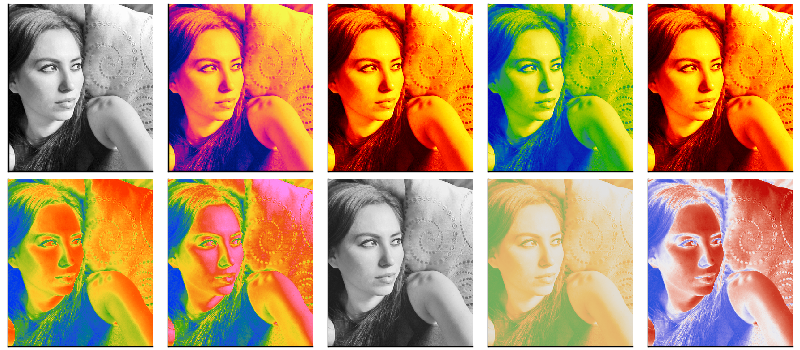

In [19]:
p = plot(
    axis = nothing,
    layout = @layout((2,5)),
    size = (800,350)
)
for i in 1:length(imgall)
    plot!(p[i], imgall[i], ratio = 1)
end
p

If you want to see more options, call `cmap()`

In [20]:
#cmap()

We can see the type of array for these cmaps, simply typing:

In [21]:
cmap("HEAT")[1:5]

5-element Array{RGBA{Float64},1} with eltype RGBA{Float64}:
 RGBA{Float64}(0.0,0.0,0.0,1.0)                                                    
 RGBA{Float64}(0.03193772547747064,0.0,0.0,1.0)                                    
 RGBA{Float64}(0.05044613729479674,0.0005201221211516858,0.0005201145661494263,1.0)
 RGBA{Float64}(0.067736823258358,0.0015382636161998962,0.0015382528825813385,1.0)  
 RGBA{Float64}(0.08425545396503306,0.0015841096960214464,0.0015840950725722123,1.0)

This will be useful later. 

`PerceptualColourMaps` has a lot of colormaps, however, I would like to have more options. That said, since we load `Plots`, then an additional set of color libraries is also available. http://docs.juliaplots.org/latest/colors/

To get a list of these libraries we use: 

In [22]:
clibraries()

5-element Array{Symbol,1}:
 :Plots      
 :cmocean    
 :misc       
 :colorcet   
 :colorbrewer

And to change the active library call: 

In [23]:
clibrary(:colorcet)

:colorcet

If you need to see the list of colorgradients in each library just call,

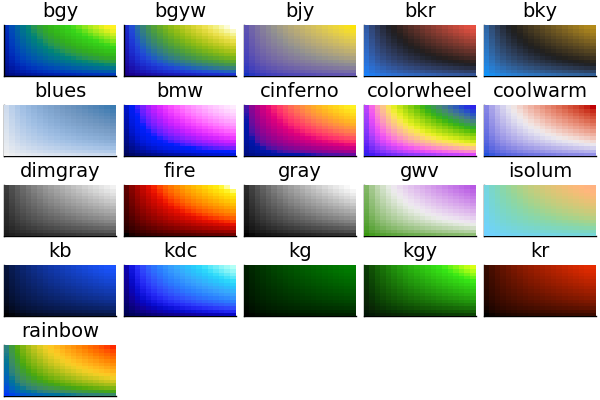

In [24]:
showlibrary(:colorcet)

Let's collect all the names 

In [25]:
cmapsColorcet = [:bgy, :bgyw, :bjy, :bkr, :bky, :blues, :bmw, 
    :cinferno, :colorwheel, :coolwarm, :dimgray, :fire, :gray, :gwv, 
    :isolum, :kb, :kdc, :kg, :kgy, :kr, :rainbow];

In [26]:
length(cmapsColorcet)

21

We can obtain the RGB values for each colormap, as follows: 

In [27]:
C(g::ColorGradient) = RGB[g[z] for z = LinRange(0,1,256)]

C (generic function with 1 method)

In [28]:
cgrad(:kdc) |> C

We need to mofify a little bit the last function, so we can have an array with the RGBA elements. 

In [29]:
C(g::ColorGradient) = [g[z] for z = LinRange(0,1,256)]

C (generic function with 1 method)

Now, if we call a `cmap` from `colorcet` the result is 

In [30]:
kdcm = cgrad(:kdc) |> C;
kdcm[1:5]

5-element Array{RGBA{Float64},1} with eltype RGBA{Float64}:
 RGBA{Float64}(0.0,0.0024382,0.30687,1.0)                       
 RGBA{Float64}(0.0,0.004048974117647059,0.31434599999999996,1.0)
 RGBA{Float64}(0.0,0.005659748235294118,0.32182199999999994,1.0)
 RGBA{Float64}(0.0,0.007270522352941177,0.329298,1.0)           
 RGBA{Float64}(0.0,0.008881296470588237,0.33677399999999996,1.0)

Which looks exactly like the array for `cmap("HEAT")[1:5]`. Now, let's apply this colormap

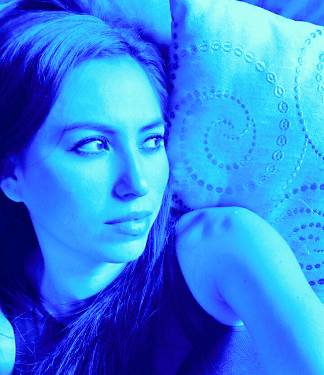

In [31]:
imgKdc = applycolormap(img, kdcm);
imgKdc = colorview(RGB, permuteddimsview(imgKdc, (3,1,2)))

This result is more appealing than the others. `cmaps` from _colorcet_ are great!. 

And for all the others 

In [32]:
imgallColorcet = []
for (indx, colorMap) in enumerate(cmapsColorcet)
    cm = cgrad(colorMap) |> C
    imgRGB = applycolormap(img, cm);
    imgRGB = colorview(RGB, permuteddimsview(imgRGB, (3,1,2)))
    push!(imgallColorcet, imgRGB)
end

In [33]:
rowimgC = [imgallColorcet[i] for i in 1:length(imgallColorcet)];

In [34]:
length(rowimgC)

21

3×7 Array{Base.ReshapedArray{RGB{Float64},2,Base.ReinterpretArray{RGB{Float64},3,Float64,PermutedDimsArray{Float64,3,(3, 1, 2),(2, 3, 1),Array{Float64,3}}},Tuple{Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64},Base.MultiplicativeInverses.SignedMultiplicativeInverse{Int64}}},2}:
 [RGB{Float64}(0.182209,0.627894,0.223643) RGB{Float64}(0.158574,0.595322,0.299988) … RGB{Float64}(0.143453,0.583104,0.330561) RGB{Float64}(0.185523,0.63603,0.206071); RGB{Float64}(0.143453,0.583104,0.330561) RGB{Float64}(0.186583,0.640089,0.197918) … RGB{Float64}(0.167421,0.603462,0.279656) RGB{Float64}(0.187643,0.644148,0.189765); … ; RGB{Float64}(0.193224,0.67645,0.132922) RGB{Float64}(0.196554,0.708414,0.103403) … RGB{Float64}(0.252174,0.850832,0.10118) RGB{Float64}(0.305298,0.863492,0.102108); RGB{Float64}(0.19033,0.656301,0.166419) RGB{Float64}(0.19228,0.668415,0.144899) … RGB{Float64}(0.239961,0.847519,0.10097) RGB{Float64}(0.264386,0.854145,0.10139)]  …  [RGB{Float64}(0.138325,0.607981,0.051899) RGB{Float64}(0.130272,0.575918,0.0483798) … RGB{Float64}(0.127251,0.563973,0.046986) RGB{Float64}(0.140362,0.616037,0.0527874); RGB{Float64}(0.127251,0.563973,0.046986) RGB{Float64}(0.141385,0.620086,0.0532402) … RGB{Float64}(0.132281,0.583897,0.0492979) RGB{Float64}(0.142408,0.624136,0.0536931); … ; RGB{Float64}(0.150556,0.656671,0.0573094) RGB{Float64}(0.158798,0.6895,0.0609107) … RGB{Float64}(0.19642,0.840778,0.0768892) RGB{Float64}(0.200648,0.85792,0.078664); RGB{Float64}(0.145464,0.636302,0.0550682) RGB{Float64}(0.148505,0.648498,0.056459) … RGB{Float64}(0.19537,0.836501,0.0764487) RGB{Float64}(0.19747,0.845054,0.0773297)] 
 [RGB{Float64}(0.38768,0.668343,0.15757) RGB{Float64}(0.33824,0.64164,0.20036) … RGB{Float64}(0.321484,0.631199,0.218154) RGB{Float64}(0.400935,0.674796,0.147787); RGB{Float64}(0.321484,0.631199,0.218154) RGB{Float64}(0.407882,0.677934,0.143298) … RGB{Float64}(0.349784,0.648514,0.188852) RGB{Float64}(0.41483,0.681072,0.138809); … ; RGB{Float64}(0.473097,0.705309,0.107758) RGB{Float64}(0.535792,0.727955,0.0894896) … RGB{Float64}(0.815758,0.821718,0.177574) RGB{Float64}(0.841648,0.832932,0.19874); RGB{Float64}(0.436075,0.690356,0.126) RGB{Float64}(0.457952,0.699439,0.114261) … RGB{Float64}(0.809129,0.818953,0.172532) RGB{Float64}(0.822386,0.824482,0.182617)]       [RGB{Float64}(0.517162,0.0976811,1.08187e-6) RGB{Float64}(0.491286,0.0928012,1.59274e-6) … RGB{Float64}(0.481646,0.0909803,1.30667e-6) RGB{Float64}(0.52367,0.098913,8.9209e-7); RGB{Float64}(0.481646,0.0909803,1.30667e-6) RGB{Float64}(0.526927,0.0995289,1.08784e-6) … RGB{Float64}(0.497721,0.0940155,1.72883e-6) RGB{Float64}(0.530183,0.100145,1.2836e-6); … ; RGB{Float64}(0.556398,0.105104,1.62115e-6) RGB{Float64}(0.582782,0.11008,9.69167e-7) … RGB{Float64}(0.704027,0.132983,0.0) RGB{Float64}(0.717736,0.135578,0.0); RGB{Float64}(0.539979,0.101998,1.69038e-6) RGB{Float64}(0.549817,0.103859,1.81257e-6) … RGB{Float64}(0.700603,0.132333,0.0) RGB{Float64}(0.707451,0.133633,0.0)]
 [RGB{Float64}(0.632666,0.607411,0.526538) RGB{Float64}(0.602386,0.588236,0.54575) … RGB{Float64}(0.59073,0.581089,0.552848) RGB{Float64}(0.640083,0.612232,0.521666); RGB{Float64}(0.59073,0.581089,0.552848) RGB{Float64}(0.643735,0.614653,0.519203) … RGB{Float64}(0.610094,0.593012,0.540997) RGB{Float64}(0.647386,0.617074,0.51674); … ; RGB{Float64}(0.67612,0.636558,0.496732) RGB{Float64}(0.704021,0.656231,0.476083) … RGB{Float64}(0.821968,0.746904,0.371495) RGB{Float64}(0.834498,0.757178,0.358144); RGB{Float64}(0.658271,0.624356,0.509308) RGB{Float64}(0.669044,0.631666,0.501807) … RGB{Float64}(0.818825,0.74434,0.374786) RGB{Float64}(0.82511,0.749469,0.368204)]     [RGB{Float64}(0.848659,0.789208,0.129574) RGB{Float64}(0.782004,0.774116,0.118056) … RGB{Float64}(0.756857,0.768309,0.113757) RGB{Float64}(0.865248,0.792873,0.13243); RGB{Float64}(0.756857,0.768309,0.113757) RGB{Float64}(0.873503,0.7946,0.133828) … RGB{Float64}(0.798735,0.77796,0.120931) RGB{Float64}(0.881757,0.796327,0.135226); … ; 
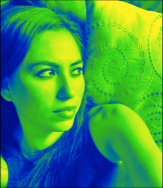
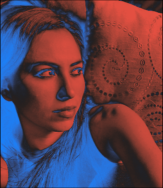
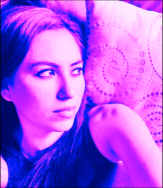
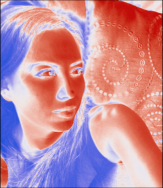
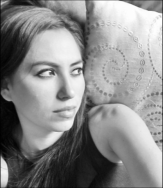
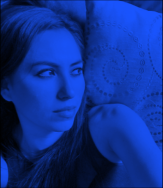
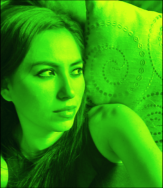
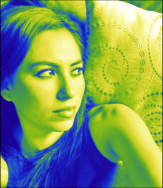
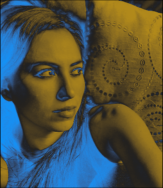
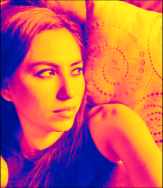
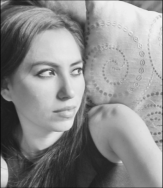
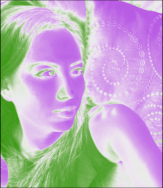
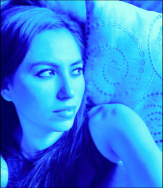
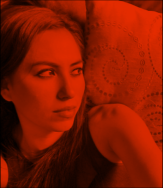
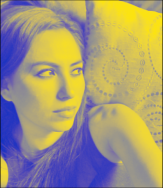
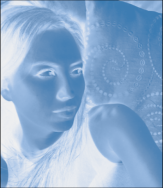
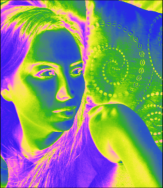
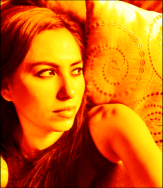
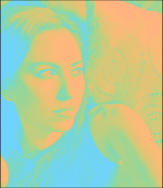
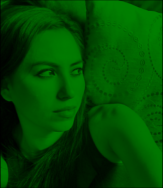
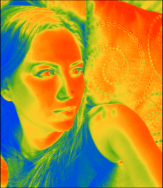

In [35]:
reshape(rowimgC , (3,7))

Similarly, you can use other colormap libraries. 